# Case study 07 (Week 11)

## **Description**

***Case study on Supervised learning***

Do the following in the iris dataset.

1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species. (also do random forest algorithm)

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

## Task 01

Read the dataset to the python environment.

In [3]:
# Reading iris.xls file into Pandas Dataframe
iData = pd.read_excel('iris.xls')
# Getting preview of 10 Random Observations
iData.sample(10)

,SL,SW,PL,PW,Classification
101,5.8,2.7,5.1,1.9,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
141,NaN,3.1,5.1,2.3,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
5,5.4,3.9,1.7,0.4,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
143,6.8,3.2,5.9,2.3,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica


## Task 02

Do necessary pre-processing steps.

In [5]:
# Fetching the basic info of the dataframe
iData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Getting number of Null values present in each columns
iData.isna().sum().to_frame('Null value count')

,Null value count
SL,7
SW,6
PL,6
PW,0
Classification,0


In [14]:
# Getting Statistical data
iData.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:

iData[iData.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


### Insights :

* Iris Dataframe contains the basic details of flowers like sepal & petal length of 3 plant species.
* Total 150 Entries are recorded.
* 3 Columns (SL, SW, PL) contain Null values.

We are going to execute a series of micro level pre-processing steps to refine the Data. If we are going to process the data at macro level, it may affect the reliability of data. Because these 3 veriety of plant species may posess unique specification compared to each other.  

**Step 1. Fixing the Null values of Iris-setosa**

In [28]:
# Selecting only Iris-setosa data
iData_setosa=iData[iData.Classification == "Iris-setosa"]
# Getting the Null values
iData_setosa[iData_setosa.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa


In [29]:
iData_setosa.describe()

,SL,SW,PL,PW
count,47.000000,47.000000,48.000000,50.00000
mean,5.008511,3.408511,1.468750,0.24400
std,0.360452,0.390557,0.175228,0.10721
min,4.300000,2.300000,1.000000,0.10000
25%,4.800000,3.100000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.200000,3.650000,1.600000,0.30000
max,5.800000,4.400000,1.900000,0.60000


In [25]:
# Reading the columns except the Object type column 
cols = iData.columns.to_list()
del cols[4]

In [30]:
import warnings
warnings.filterwarnings('ignore')
# Replacing Null values with Mean values
for i in cols:
    iData_setosa[i].fillna(iData_setosa[i].mean(), inplace=True)

**Step 2. Fixing the Null values of Iris-versicolor**

In [31]:
# Selecting only Iris-versicolor data
iData_versicolor=iData[iData.Classification == "Iris-versicolor"]
# Displaying the Null values
iData_versicolor[iData_versicolor.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor
72,6.3,NaN,4.9,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor


In [32]:
iData_versicolor.describe()

,SL,SW,PL,PW
count,48.000000,48.000000,48.000000,50.000000
mean,5.925000,2.781250,4.252083,1.326000
std,0.522474,0.315322,0.475345,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.850000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [33]:
import warnings
warnings.filterwarnings('ignore')
# Replacing Null values with Mean values
for i in cols:
    iData_versicolor[i].fillna(iData_versicolor[i].mean(), inplace=True)

**Step 3. Fixing the Null values of  Iris-virginica**

In [34]:
# Selecting only Iris-virginica data
iData_virginica=iData[iData.Classification == "Iris-virginica"]
# Displaying the Null values
iData_virginica[iData_virginica.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
106,NaN,2.5,4.5,1.7,Iris-virginica
109,7.2,3.6,NaN,2.5,Iris-virginica
124,6.7,NaN,5.7,2.1,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


In [38]:
iData_virginica.describe()

,SL,SW,PL,PW
count,48.000000,49.000000,48.000000,50.00000
mean,6.616667,2.967347,5.547917,2.02600
std,0.598343,0.322353,0.555433,0.27465
min,5.600000,2.200000,4.500000,1.40000
25%,6.275000,2.800000,5.100000,1.80000
50%,6.500000,3.000000,5.550000,2.00000
75%,6.950000,3.100000,5.825000,2.30000
max,7.900000,3.800000,6.900000,2.50000


In [39]:
import warnings
warnings.filterwarnings('ignore')
# Replacing Null values with Mean values
for i in cols:
    iData_virginica[i].fillna(iData_virginica[i].mean(), inplace=True)

In [97]:
# Concatenating the 3 fixed parts of Dataframe into one
temp = [iData_setosa, iData_versicolor, iData_virginica]
iData_pre = pd.concat(temp)
iData_pre.isna().sum().to_frame('Null value count')

,Null value count
SL,0
SW,0
PL,0
PW,0
Classification,0


**Step 4. Checking for outliers in the Data**

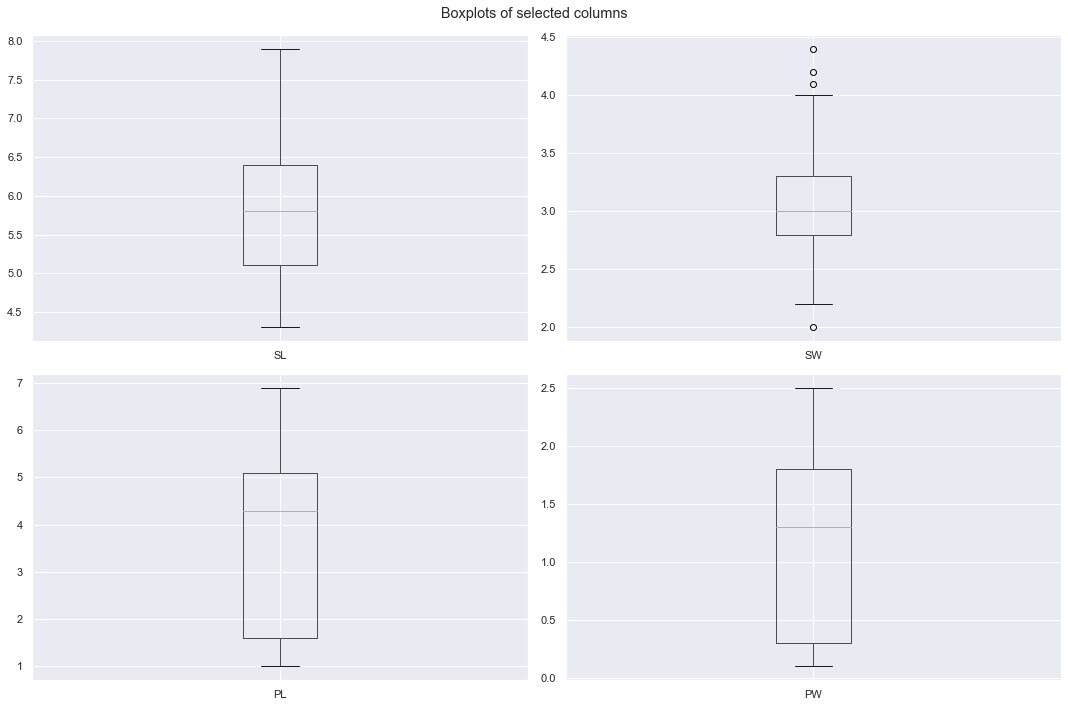

In [50]:
# Plotting Boxplot
# Dropping the object type column
iData_pre02 = iData_pre.drop(iData_pre.columns[[4]], axis = 1)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of selected columns')

for i,el in enumerate(list(iData_pre02.columns.values)):
    a = iData_pre02.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

### Insights :

* From the above boxplots, Sepal Width contains some noticable outliers.
* But we need a closer look to confirm our findings.

In [41]:
# Unpivoting the Dataset w.r.t 'Classification'
iData_pre01 = pd.melt(iData_pre, "Classification", var_name="Specification")
iData_pre01.head(5)

,Classification,Specification,value
0,Iris-setosa,SL,5.100000
1,Iris-setosa,SL,4.900000
2,Iris-setosa,SL,5.008511
3,Iris-setosa,SL,4.600000
4,Iris-setosa,SL,5.000000


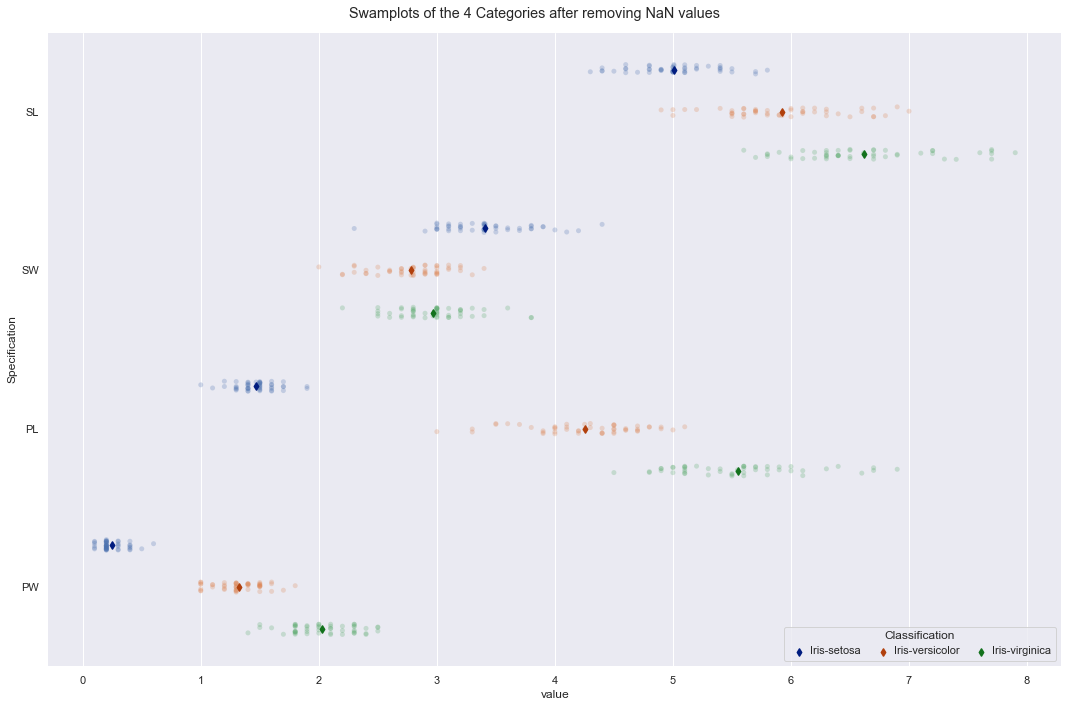

In [44]:
sns.set_theme(style="darkgrid")

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 10))
f.suptitle('Swamplots of the 4 Categories after removing NaN values')
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="Specification", hue="Classification",
              data=iData_pre01, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the center of the strips by adjusting the width allotted to each category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="Specification", hue="Classification",
              data=iData_pre01, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Classification",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
f.tight_layout()

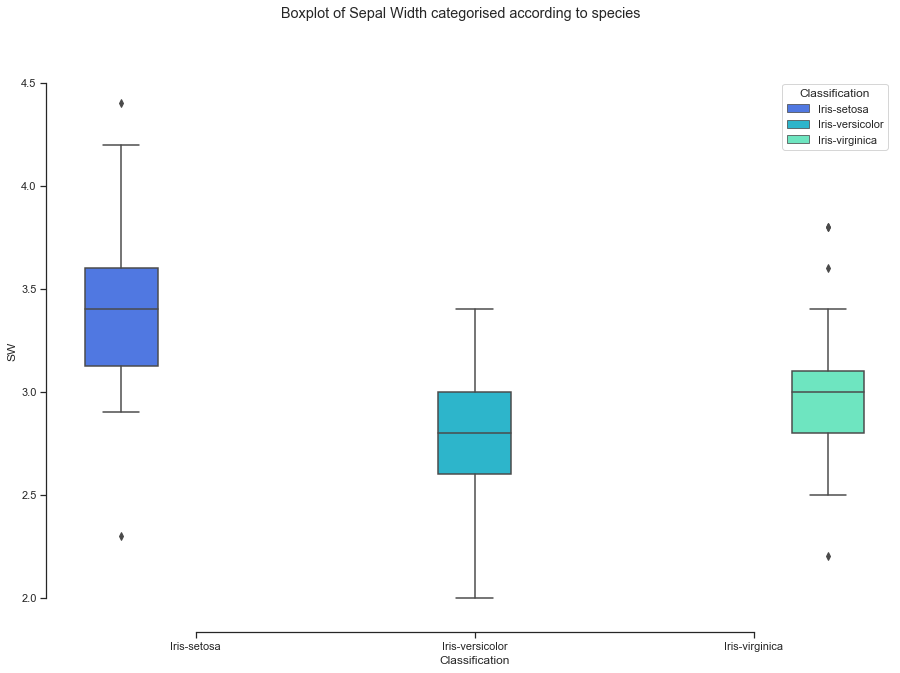

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Boxplot of Sepal Width categorised according to species')
sns.set_theme(style="ticks", palette="rainbow")

# Plotting a nested boxplot
sns.boxplot(x="Classification", y="SW",
            hue="Classification",
            data=iData_pre)
sns.despine(offset=10, trim=True)

### Insights :

* First swamplot signals the presence of possible outlier points in SW Data of Iris-setosa and Iris-virginica.
* For a closer look, I plotted a Boxplot of the corresponding data and confirmed my findings.
* Potential outliers are present in SW Data of Iris-setosa and Iris-virginica.

**Step 5. Dropping outliers in SW of Iris-setosa**

In [98]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(iData_pre[iData_pre.Classification == 'Iris-setosa'].SW,25,interpolation='midpoint')
Q2=np.percentile(iData_pre[iData_pre.Classification == 'Iris-setosa'].SW,50,interpolation='midpoint')
Q3=np.percentile(iData_pre[iData_pre.Classification == 'Iris-setosa'].SW,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in iData_pre[iData_pre.Classification == 'Iris-setosa'].SW:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Ouliers are there in SW column (Iris-setosa) and they are given below:\n',outliers)

2 Ouliers are there in SW column (Iris-setosa) and they are given below:
 [4.4, 2.3]


In [99]:
# Finding outliers and their indexes
ol=(iData_pre[iData_pre.Classification == 'Iris-setosa'].SW > upper_limit) + (iData_pre[iData_pre.Classification == 'Iris-setosa'].SW < lower_limit)
oli=iData_pre[iData_pre.Classification == 'Iris-setosa'].SW.loc[ol].index

In [100]:
# Dropping outliers by their indexes
iData_pre.drop(oli, inplace=True)

**Step 6. Dropping outliers in SW of Iris-virginica**

In [101]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(iData_pre[iData_pre.Classification == 'Iris-virginica'].SW,25,interpolation='midpoint')
Q2=np.percentile(iData_pre[iData_pre.Classification == 'Iris-virginica'].SW,50,interpolation='midpoint')
Q3=np.percentile(iData_pre[iData_pre.Classification == 'Iris-virginica'].SW,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in iData_pre[iData_pre.Classification == 'Iris-virginica'].SW:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Ouliers are there in SW column (Iris-virginica) and they are given below:\n',outliers)

4 Ouliers are there in SW column (Iris-virginica) and they are given below:
 [3.6, 3.8, 2.2, 3.8]


In [102]:
# Finding outliers and their indexes
ol=(iData_pre[iData_pre.Classification == 'Iris-virginica'].SW > upper_limit) + (iData_pre[iData_pre.Classification == 'Iris-virginica'].SW < lower_limit)
oli=iData_pre[iData_pre.Classification == 'Iris-virginica'].SW.loc[ol].index

In [103]:
# Dropping outliers by their indexes
iData_pre.drop(oli, inplace=True)

**Step 7. Checking the Fixed data for confirmation**

In [104]:
# Unpivoting the Dataset w.r.t 'Classification'
iData_pre01 = pd.melt(iData_pre, "Classification", var_name="Specification")
iData_pre01.head(5)

,Classification,Specification,value
0,Iris-setosa,SL,5.100000
1,Iris-setosa,SL,4.900000
2,Iris-setosa,SL,5.008511
3,Iris-setosa,SL,4.600000
4,Iris-setosa,SL,5.000000


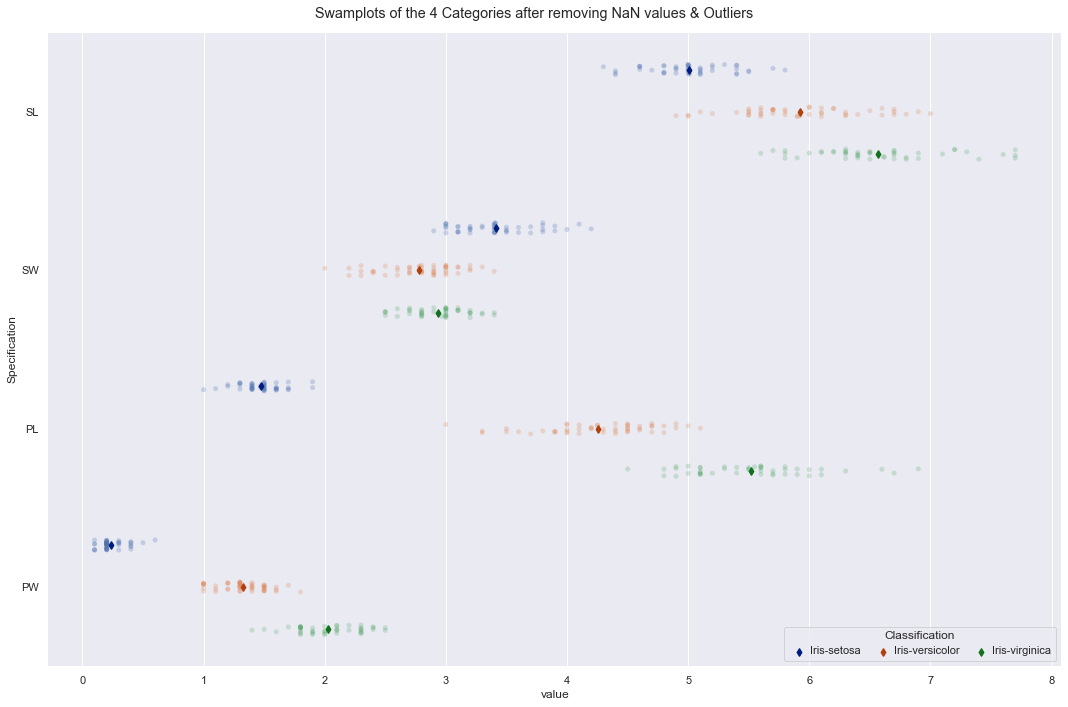

In [105]:
sns.set_theme(style="darkgrid")

# Initialize the figure
f, ax = plt.subplots(figsize=(15, 10))
f.suptitle('Swamplots of the 4 Categories after removing NaN values & Outliers')
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="Specification", hue="Classification",
              data=iData_pre01, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the center of the strips by adjusting the width allotted to each category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="Specification", hue="Classification",
              data=iData_pre01, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Classification",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
f.tight_layout()

In [17]:
# Getting the shape of the Dataframe
iData_pre.shape

(144, 5)

### Insights :

* Above swamplot represents the final state of the data after removing outliers and fixing null values.
* From the viz. we can affirm that the data is fit for further analysis.
* After necessary pre-processing, the total entries in our dataframe get redused from 150 to 144.

## Task 03

Find out which classification model gives the best result to predict iris species. (also do random forest algorithm)

In [8]:
# Getting the Unique values in the Classification column and the frequency
iData_pre.Classification.value_counts(normalize=True).to_frame()

,Classification
Iris-versicolor,0.347222
Iris-setosa,0.333333
Iris-virginica,0.319444


In [10]:
# Listing the Column names
iData_pre.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [33]:
# Dividing the Dataframe
X=iData_pre.drop('Classification', axis=1)
y=iData_pre.Classification

In [35]:
# Splitting the Dataframe into Test & Train sets
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.33)

In [36]:
print('Shape of X_Train, y_Train, X_Test and y_Test are:',X_Train.shape, y_Train.shape,X_Test.shape,y_Test.shape)

Shape of X_Train, y_Train, X_Test and y_Test are: (96, 4) (96,) (48, 4) (48,)


### Model 1 : Logistic Regression

In [38]:
import warnings
warnings.filterwarnings('ignore')
# Importing LogisticRegression from sklearn.linear_model as LR
from sklearn.linear_model import LogisticRegression as LR
LR_Model=LR()
LR_Model.fit(X_Train, y_Train)
# Predicting the values using Test data
y_Pred=LR_Model.predict(X_Test)

In [43]:
# Importing confusion_matrix from sklearn.metrics as CM
from sklearn.metrics import confusion_matrix as CM
# Importing classification_report from sklearn.metrics as CR
from sklearn.metrics import classification_report as CR
# Final status of the predictions made by the Logistic Regression Classifier
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
# Importing accuracy_score from sklearn.metrics as ASC
from sklearn.metrics import accuracy_score as ASC
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        48
      macro avg       0.98      0.97      0.98        48
   weighted avg       0.98      0.98      0.98        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  1 12]]
Accuracy score of the given model is 0.9791666666666666


### Model 2 : K-Nearest Neighbours

*For better results we have to assign an optimal number for n_neighbors while making a model with KNN. In order to achieve our target let's check within a pre-defined range of n_neighbors and select one with a higher accuracy*

In [44]:
# Importing KNeighborsClassifier from sklearn.neighbors as KNC
from sklearn.neighbors import KNeighborsClassifier as KNC
Accuracy_range=[]
N_range=np.arange(4,20)
for i in N_range:
    KModel=KNC(n_neighbors=i)
    KModel.fit(X_Train,y_Train)
    y_Pred=KModel.predict(X_Test)
    Accuracy_range.append(ASC(y_Test,y_Pred))
    

In [69]:
print(Accuracy_range)

[0.9791666666666666, 0.9791666666666666, 0.9583333333333334, 0.9583333333333334, 0.9375, 0.9375, 0.9375, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9791666666666666, 0.9583333333333334, 0.9583333333333334]


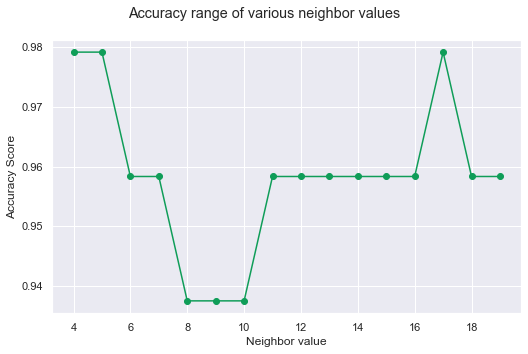

In [60]:
f, ax = plt.subplots(figsize=(7.5, 5))
f.suptitle('Accuracy range of various neighbor values')
sns.set_theme()
plt.plot( N_range, Accuracy_range, marker='o', color='#0F9D58')
plt.xlabel('Neighbor value')
plt.ylabel('Accuracy Score')
f.tight_layout()
plt.show()

> Selecting optimal neighbor value as '5'

In [61]:
KModel=KNC(n_neighbors=5)
KModel.fit(X_Train,y_Train)
y_Pred=KModel.predict(X_Test)

In [62]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        48
      macro avg       0.98      0.97      0.98        48
   weighted avg       0.98      0.98      0.98        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  1 12]]
Accuracy score of the given model is 0.9791666666666666


### Model 3 : SVM (Support Vector Machines-Radial mode)

In [67]:
# Importing SVC from sklearn.svm
from sklearn.svm import SVC
# Selecting kernel mode as Radial
SVCModel = SVC(kernel='rbf')
SVCModel.fit(X_Train,y_Train)
y_Pred = SVCModel.predict(X_Test)

In [68]:
# Final status of the predictions made by the SVM Classifier
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        48
      macro avg       0.96      0.95      0.95        48
   weighted avg       0.96      0.96      0.96        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  2 11]]
Accuracy score of the given model is 0.9583333333333334


### Model 4 : Decision trees

In [70]:
# Importing SVC from sklearn.tree as DTC
from sklearn.tree import DecisionTreeClassifier as DTC
DTCModel = DTC()
DTCModel.fit(X_Train,y_Train)
y_Pred = DTCModel.predict(X_Test)

In [71]:
# Final status of the predictions made by the Decision trees Classifier
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        48
      macro avg       0.96      0.95      0.95        48
   weighted avg       0.96      0.96      0.96        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  2 11]]
Accuracy score of the given model is 0.9583333333333334


### Model 5 : Random forest

In [101]:
# Importing RandomForestClassifier sklearn.ensemble as RFC
from sklearn.ensemble import RandomForestClassifier as RFC
RModel=RFC(n_estimators=100, random_state=42)
#Training the model
RModel.fit(X_Train,y_Train)
y_Pred=RModel.predict(X_Test)

In [102]:
# Final status of the predictions made by the Random Forest Classifier
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        48
      macro avg       0.98      0.97      0.98        48
   weighted avg       0.98      0.98      0.98        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  1 12]]
Accuracy score of the given model is 0.9791666666666666


In [103]:
# Checking Feature importance of independent variables
feature_imp = pd.Series(RModel.feature_importances_,index=X.columns).sort_values(ascending=False)*100
feature_imp

PW    46.237662
PL    39.429712
SL    10.203545
SW     4.129081
dtype: float64

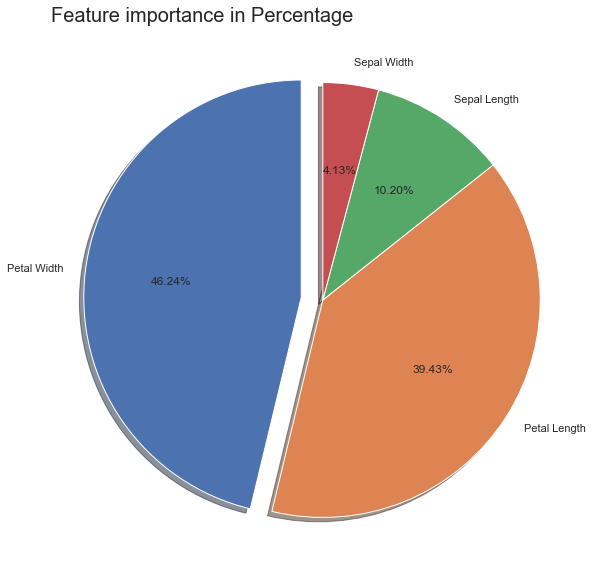

In [108]:
# Variable for plot
explode = (0.1, 0, 0,0)
# Plotting a pie diagram
fig = plt.figure(figsize=(10, 10))
plt.pie(feature_imp, explode=explode,  shadow=True, startangle=90, labels = ['Petal Width', 'Petal Length', 'Sepal Length', 'Sepal Width'], autopct='%1.2f%%')
plt.title(label="Feature importance in Percentage",
          loc="left",
          fontsize=20)

plt.show()

*Sepal Width a.k.a SW has negligible importance in our data set, so building a new model with refined feature set*

In [109]:
# Getting Test & Train data once again
X.drop('SW', axis=1, inplace=True)
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=42, test_size=0.33)

In [121]:
RModel=RFC(n_estimators=100, random_state=42)
#Training the model
RModel.fit(X_Train,y_Train)
y_Pred=RModel.predict(X_Test)

In [122]:
# Final status of the predictions made by the Random Forest Classifier after refining the data
print(CR(y_Test , y_Pred))
print('Confusion matrix of the model is:\n',CM(y_Test, y_Pred))
# Accuracy score
print('Accuracy score of the given model is',ASC(y_Pred,y_Test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        48
      macro avg       0.96      0.95      0.95        48
   weighted avg       0.96      0.96      0.96        48

Confusion matrix of the model is:
 [[18  0  0]
 [ 0 17  0]
 [ 0  2 11]]
Accuracy score of the given model is 0.9583333333333334


**Reduction of SW Feature caused a drop in accuracy, so it's not a good idea to drop SW from this dataframe**

## Summary

### Accuracy score of 5 Models :

1. Logistic Regression: 0.9791666666666666
2. K-Nearest Neighbors: 0.9791666666666666
3. SVC: 0.9583333333333334
4. Decision trees: 0.9583333333333334
5. Random Forest (w/o refinement in data): 0.9791666666666666
6. Random Forest (with refinement in data): 0.9583333333333334

After analysing the performance of all these models we can conclude that Logistic Regression, KNN & Random forest algorithms are best suited for predicting the values in the Classification feature of this dataframe.

*End of the file reached!*